In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
co2=pd.read_excel("/content/drive/MyDrive/CO2 dataset.xlsx")
co2

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542
...,...,...
210,2010,15.60000
211,2011,15.60000
212,2012,14.80000
213,2013,14.70000


In [7]:
co2.isnull().sum()

Year    0
CO2     0
dtype: int64

In [8]:
co2.notnull().sum()

Year    215
CO2     215
dtype: int64

In [9]:
#finging data types
co2.dtypes

Year      int64
CO2     float64
dtype: object

In [10]:
co2.describe()

,Year,CO2
count,215.000000,215.000000
mean,1907.000000,6.741970
std,62.209324,6.522437
min,1800.000000,0.001750
25%,1853.500000,0.041050
50%,1907.000000,6.390000
75%,1960.500000,11.500000
max,2014.000000,18.200000


{'boxes': [<matplotlib.lines.Line2D at 0x7efec70f45d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7efec7101650>,
 'fliers': [<matplotlib.lines.Line2D at 0x7efec7101ed0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7efec7106150>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7efec7add990>,
  <matplotlib.lines.Line2D at 0x7efec70f4ed0>]}

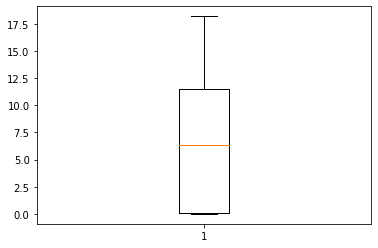

In [11]:
#boxplot
plt.boxplot(co2.CO2)

<Figure size 1440x1152 with 0 Axes>

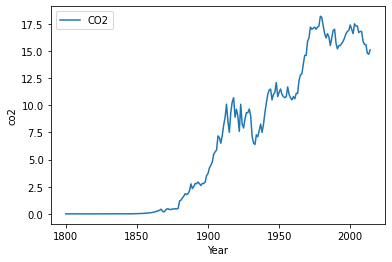

In [12]:
plt.figure(figsize=(20,16))
co2.plot('Year','CO2')
plt.xlabel("Year")
plt.ylabel("co2")
plt.show()

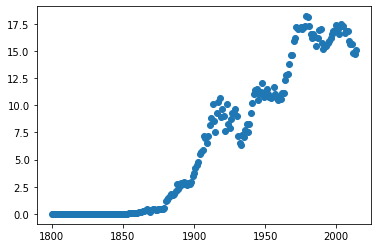

In [13]:
#scatter plot
plt.scatter(co2['Year'],co2['CO2'])

(array([85., 15.,  4., 12., 15., 20., 14.,  3., 21., 26.]),
 array([1.7500000e-03, 1.8215750e+00, 3.6414000e+00, 5.4612250e+00,
        7.2810500e+00, 9.1008750e+00, 1.0920700e+01, 1.2740525e+01,
        1.4560350e+01, 1.6380175e+01, 1.8200000e+01]),
 <a list of 10 Patch objects>)

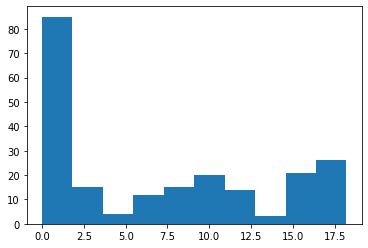

In [14]:
#histogram
plt.hist(co2.CO2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


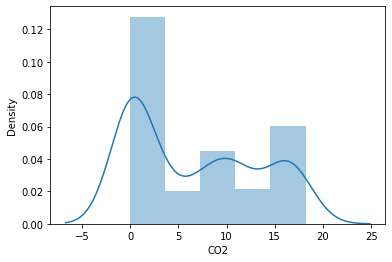

In [15]:
#distplot
sns.distplot(co2.CO2)

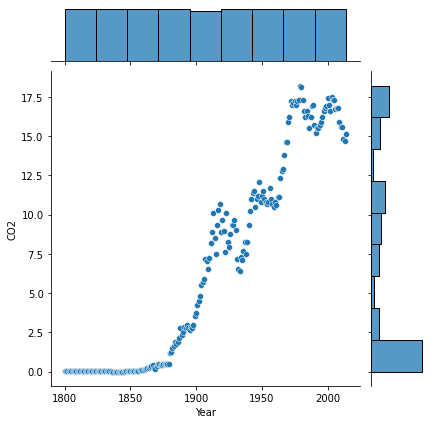

In [16]:
sns.jointplot(x=co2['Year'], y=co2['CO2'], data = co2)

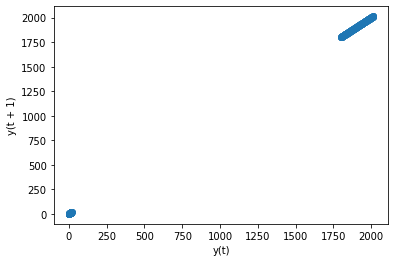

In [17]:
from pandas.plotting import lag_plot
pd.plotting.lag_plot(co2, lag=1)

In [18]:
sek= co2['CO2'].skew()
sek

0.3627361392624211

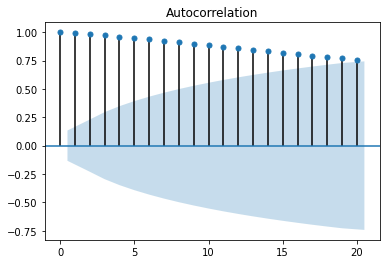

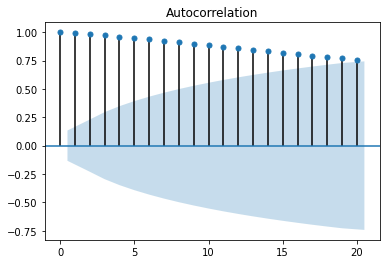

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
series = pd.read_excel('/content/drive/MyDrive/CO2 dataset.xlsx', header=0, index_col=0,parse_dates=True)
plot_acf(series,lags=20)

In [22]:
dataset=pd.read_excel('/content/drive/MyDrive/CO2 dataset.xlsx')
dataset1=dataset.set_index(["Year"])
dataset1

,CO2
Year,
1800,0.00568
1801,0.00561
1802,0.00555
1803,0.00548
1804,0.00542
...,...
2010,15.60000
2011,15.60000
2012,14.80000


In [23]:
#Determine rolling statistics
rolmean= dataset1.rolling(window=10).mean()

rolstd=dataset1.rolling(window=10).std()
print(rolmean,rolstd)

        CO2
Year       
1800    NaN
1801    NaN
1802    NaN
1803    NaN
1804    NaN
...     ...
2010  16.75
2011  16.61
2012  16.43
2013  16.15
2014  15.93

[215 rows x 1 columns]            CO2
Year          
1800       NaN
1801       NaN
1802       NaN
1803       NaN
1804       NaN
...        ...
2010  0.605989
2011  0.696738
2012  0.901912
2013  0.965229
2014  0.923821

[215 rows x 1 columns]


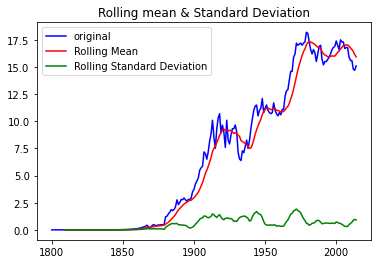

In [24]:
#PLot rolling statistics:
orig=plt.plot(dataset1,color="blue",label="original")
mean=plt.plot(rolmean,color="red",label="Rolling Mean")
std=plt.plot(rolstd,color="green",label="Rolling Standard Deviation")
plt.legend(loc="best")
plt.title("Rolling mean & Standard Deviation")
plt.show(block=False)

In [25]:
#perform Dickey fuller Test:
from statsmodels.tsa.stattools import adfuller

print("Result of Dickey-fuller Test:")
dftest=adfuller(dataset1["CO2"],autolag="AIC")

dfoutput=pd.Series(dftest[0:4],index=["Test Statstic","P-Value","#Lags Used","Number of observations Used"])
for key,value in dftest [4].items():
  dfoutput ["Critical Value (%s" %key]=value

print (dfoutput)

Result of Dickey-fuller Test:
Test Statstic                   -0.378463
P-Value                          0.913633
#Lags Used                       0.000000
Number of observations Used    214.000000
Critical Value (1%              -3.461282
Critical Value (5%              -2.875143
Critical Value (10%             -2.574020
dtype: float64


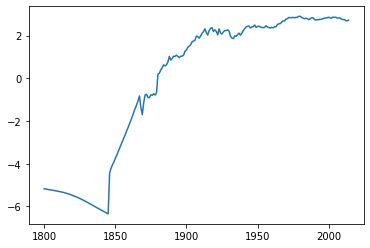

In [26]:
#Estimating Trend
dataset_logscale=np.log(dataset1)
plt.plot(dataset_logscale)

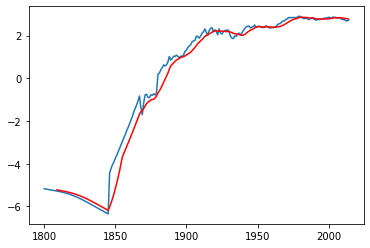

In [27]:
#moving Average
movingAverage=dataset_logscale.rolling(window=10).mean()
movingSTD=dataset_logscale.rolling(window=10).std()
plt.plot(dataset_logscale)
plt.plot(movingAverage,color="red")

In [28]:
ds=dataset_logscale-movingAverage
ds.head(10)

#Remove null values
ds.dropna(inplace=True)
ds.head(10)

,CO2
Year,
1809,-0.052777
1810,-0.054616
1811,-0.056489
1812,-0.058218
1813,-0.059980
1814,-0.063487
1815,-0.068621
1816,-0.073493
1817,-0.079916


In [29]:
def test_stationary(timeseries):
  #Determine rolling statistics
  movingAverage= timeseries.rolling(window=10).mean()
  movingstd=timeseries.rolling(window=10).std()

  #PLot rolling statistics:
  orig=plt.plot(timeseries,color="blue",label="original")
  mean=plt.plot(movingAverage,color="red",label="Rolling Mean")
  std= plt.plot(movingSTD,color="green",label="Rolling Standard Deviation")
  plt.legend(loc="best")
  plt.title("Rolling mean & Standard Deviation")
  plt.show(block=False)

  #perform Dickey fuller Test:
  print("Result of Dickey-fuller Test:")
  dftest=adfuller(timeseries["CO2"],autolag="AIC")
  dfoutput=pd.Series(dftest[0:4],index=["Test Statstic","P-Value","#Lags Used","Number of observations Used"])
  for key,value in dftest [4].items():
    dfoutput ["Critical Value (%s" %key]=value
  print (dfoutput)

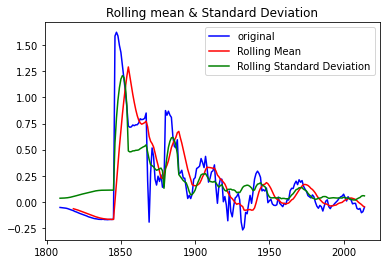

Result of Dickey-fuller Test:
Test Statstic                   -3.248746
P-Value                          0.017331
#Lags Used                       0.000000
Number of observations Used    205.000000
Critical Value (1%              -3.462658
Critical Value (5%              -2.875744
Critical Value (10%             -2.574341
dtype: float64


In [30]:
test_stationary(ds)

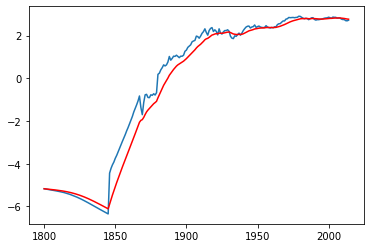

In [31]:
weightedaverage=dataset_logscale.ewm(halflife=5,min_periods=0,adjust=True).mean()
plt.plot(dataset_logscale)
plt.plot(weightedaverage,color="red")

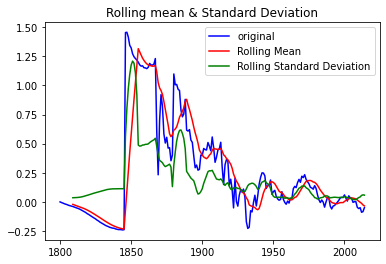

Result of Dickey-fuller Test:
Test Statstic                   -2.603649
P-Value                          0.092246
#Lags Used                       0.000000
Number of observations Used    214.000000
Critical Value (1%              -3.461282
Critical Value (5%              -2.875143
Critical Value (10%             -2.574020
dtype: float64


In [32]:
ds1=dataset_logscale-weightedaverage
test_stationary(ds1)

Business Objective:

To forecast Co2 levels for an organization so that the organization can follow government norms with respect to Co2 emission levels.

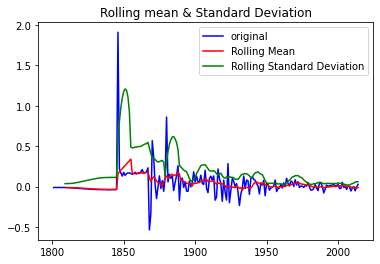

Result of Dickey-fuller Test:
Test Statstic                 -1.266898e+01
P-Value                        1.256588e-23
#Lags Used                     0.000000e+00
Number of observations Used    2.130000e+02
Critical Value (1%            -3.461429e+00
Critical Value (5%            -2.875207e+00
Critical Value (10%           -2.574054e+00
dtype: float64


In [33]:
datasetlogdiffshifting=dataset_logscale-dataset_logscale.shift(1)
datasetlogdiffshifting.dropna(inplace=True)
test_stationary(datasetlogdiffshifting)

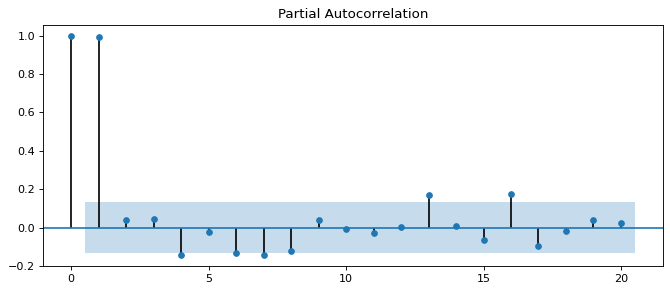

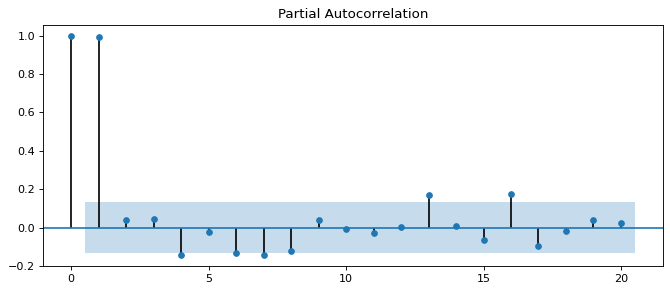

In [34]:
# acf and pacf plots
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1) = plt.subplots(1, 1,figsize=(10,4), dpi= 80)
#fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(10,4), dpi= 80)
#plot_acf(dataset.CO2.tolist(), ax=ax1, lags=50)
plot_pacf(dataset.CO2.tolist(), ax=ax1, lags=20)

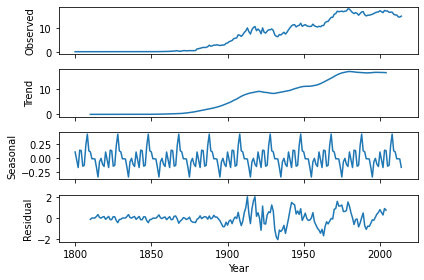

In [37]:
# Time series decomposition plot
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(dataset1.CO2,model="additive", freq=20)
decompose_ts_add.plot()
plt.show()

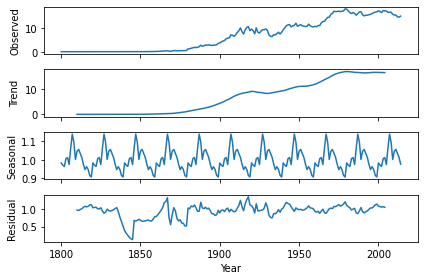

In [39]:
decompose_ts_mul = seasonal_decompose(dataset1.CO2,model="multipilicative", freq=20)
decompose_ts_mul.plot()
plt.show()



```
# This is formatted as code
```

#Transformation

In [40]:
#Calculate the log
dataset1["co2_log"]=np.log(dataset1["CO2"])

#Calculate the square root 
dataset1["co2_sqrt"]=np.sqrt(dataset1["CO2"])

#Calculate the cubed root
dataset1["co2_cbrt"]=np.cbrt(dataset1["CO2"])

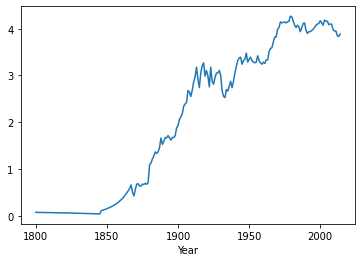

In [41]:
dataset1["co2_sqrt"].dropna().plot()

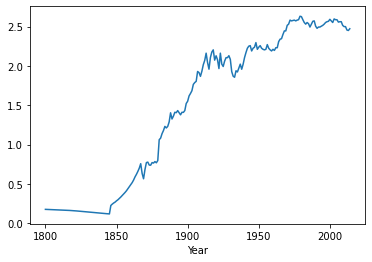

In [42]:
dataset1["co2_cbrt"].dropna().plot()

In [43]:
#Expontial Smoothing single
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt 
fit1=SimpleExpSmoothing(dataset1.CO2).fit(smoothing_level=0.2,optimized=False)

fit2=SimpleExpSmoothing(dataset1.CO2).fit(smoothing_level=0.8,optimized=False)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


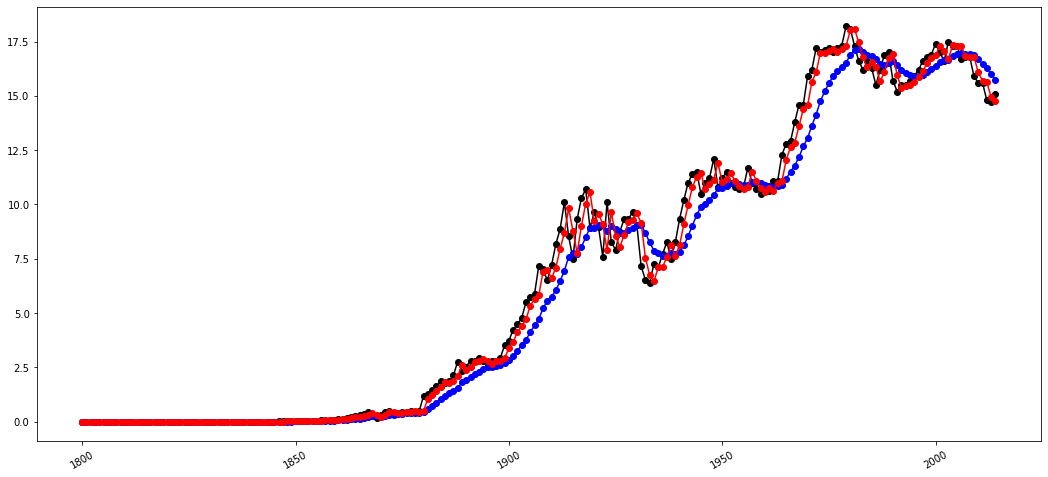

In [44]:
plt.figure(figsize=(18, 8))
plt.plot(dataset1.CO2,marker='o',color='black')
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues,marker='o', color='blue')

plt.plot(fit2.fittedvalues, marker='o', color='red')

In [45]:
#Holt method for exponential smoothing
fit1=Holt(dataset1.CO2).fit()

fit2=Holt(dataset1.CO2, exponential=True).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


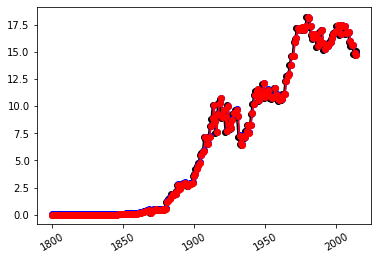

In [46]:
plt.plot(dataset1.CO2,marker='o',color='black')
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues,marker='o', color='blue')

plt.plot(fit2.fittedvalues, marker='o', color='red')

In [47]:
#Autoregressive model

          CO2
Year         
1800  0.00568
1801  0.00561
1802  0.00555
1803  0.00548
1804  0.00542


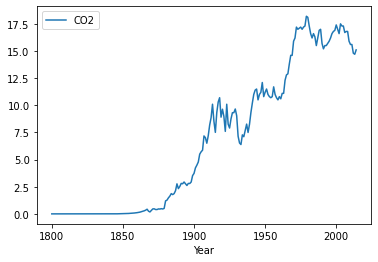

In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

series=pd.read_excel('/content/drive/MyDrive/CO2 dataset.xlsx', header=0, index_col=0)
print(series.head())
series.plot()
pyplot.show()

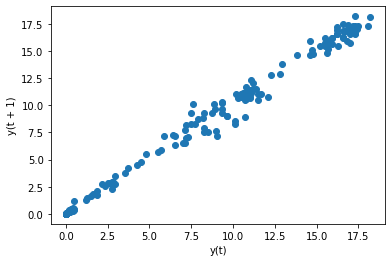

In [50]:
from pandas.plotting import lag_plot
lag_plot(series)
pyplot.show()

In [51]:

from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot

values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.996455
t+1  0.996455  1.000000


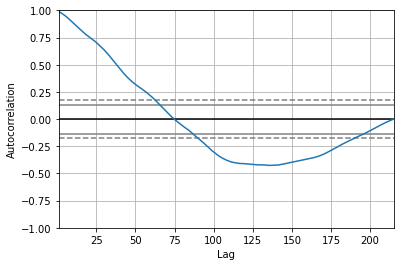

In [52]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

Test MSE: 0.208


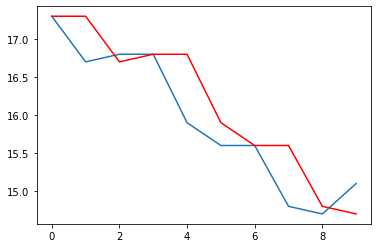

In [53]:
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-10], X[len(X)-10:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
# create and evaluate a static autoregressive model

from matplotlib import pyplot
import statsmodels.api as sm
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order 
from sklearn.metrics import mean_squared_error
from math import sqrt
# split dataset
X = series.values
train, test = X[1:len(X)-10], X[len(X)-10:]
# train autoregression
model = AutoReg(train, lags=35)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
print('Test MSE: %.3f' % test_score)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [62]:
pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 4.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
#create and evaluate an updated autoregressive model
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# split dataset
X = series.values
train, test = X[1:len(X)-10], X[len(X)-10:]
# train autoregression
window = 35
model = AutoReg(train, lags=35)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
 from statsmodels.tsa.arima_model import ARIMA
 


In [ ]:
Model=ARIMA(dataset1.CO2, order=(1,1,1))
result_ARIMA=Model.fit()

In [55]:
#Vector Autoregression (VAR)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [56]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [58]:
#Import the data
#filepath = "/content/CO2 dataset.csv"
df = pd.read_excel('/content/drive/MyDrive/CO2 dataset.xlsx', header=0, index_col=0,parse_dates=True)
print(df.shape)  # (123, 8)
df.tail()

(215, 1)


,CO2
Year,
2010-01-01,15.6
2011-01-01,15.6
2012-01-01,14.8
2013-01-01,14.7
2014-01-01,15.1


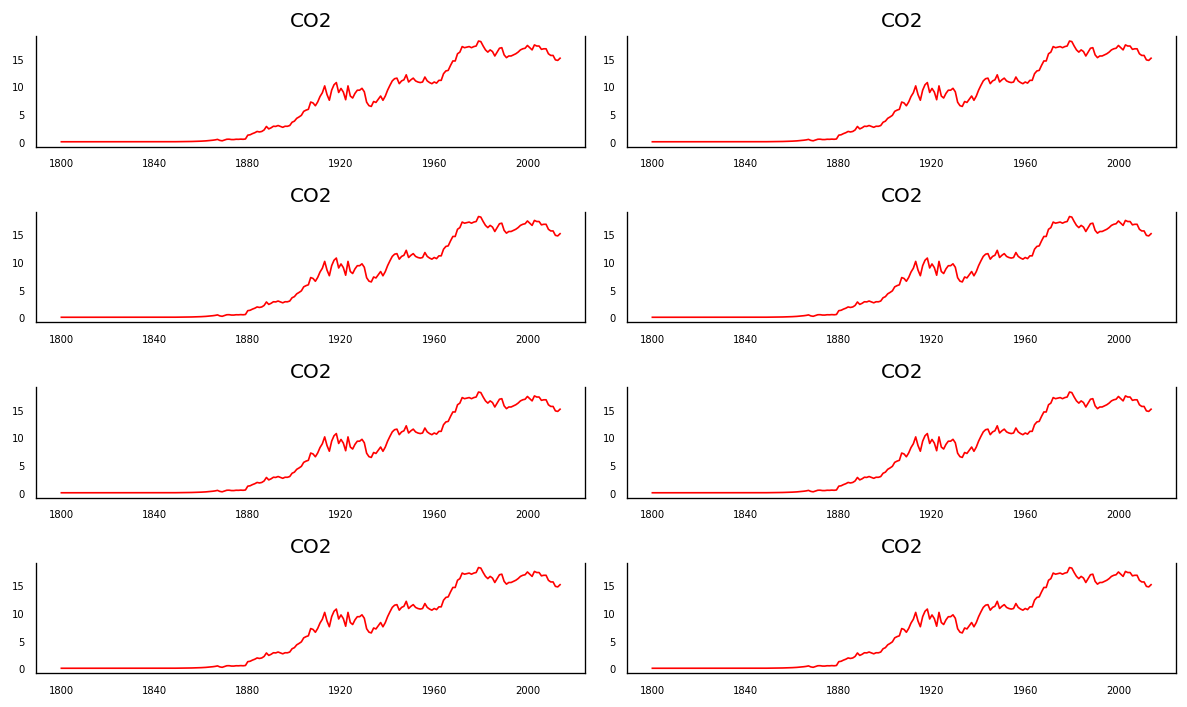

In [59]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[0]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[0])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [68]:
data = pd.read_excel('/content/drive/MyDrive/CO2 dataset.xlsx', header=0)
data

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542
...,...,...
210,2010,15.60000
211,2011,15.60000
212,2012,14.80000
213,2013,14.70000


In [69]:
#Splitting Time Series into Training and Test Series
train_len = 120
train = data[:train_len]
test = data[train_len:]

In [70]:
#Simple Time Series Methods Naive Method
def create_method(title, func):
    y_hat = test.copy()
    y_hat[title] = func
    return y_hat
    
y_hat_naive = create_method('naive_forecast', train.CO2[train_len - 1])

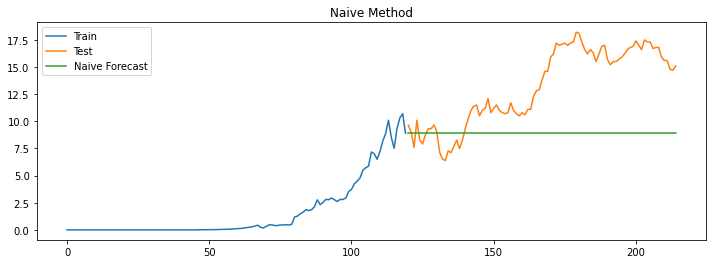

In [71]:
def plot_method(y_hat, title):
    plt.figure(figsize=(12,4))
    plt.plot(train.CO2, label = 'Train')
    plt.plot(test.CO2, label = 'Test')
    plt.plot(y_hat, label = title + ' Forecast')
    plt.legend(loc='best')
    plt.title(title + ' Method')
    plt.show()
    
plot_method(y_hat_naive.naive_forecast, 'Naive')

In [72]:

from sklearn.metrics import mean_squared_error

def calculate_error(y_hat, title, prevResults, length):
    rmse = np.sqrt(mean_squared_error(test.CO2, y_hat[length:])).round(2)
    mape = np.round(np.mean(np.abs(test.CO2-y_hat[length:])/test.CO2)*100, 2)

    results = pd.DataFrame({'Method':[title + ' Method'], 'RMSE':[rmse], 'MAPE':[mape]})
    results = pd.concat([prevResults, results])
    return results

results = calculate_error(y_hat_naive.naive_forecast, 'Naive', None, 0)
results

,Method,RMSE,MAPE
0,Naive Method,5.51,31.38


In [73]:
#Simple Average Method
y_hat_avg = create_method('avg_forecast', train.CO2.mean())

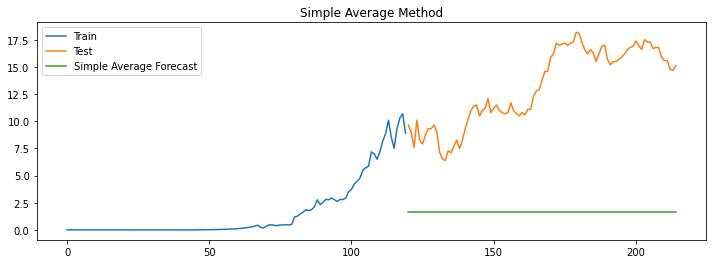

In [74]:
#Plot Train, Test and Forecast
plot_method(y_hat_avg.avg_forecast, 'Simple Average')

In [75]:
results = calculate_error(y_hat_avg.avg_forecast, 'Simple Average', results, 0)
results

,Method,RMSE,MAPE
0,Naive Method,5.51,31.38
0,Simple Average Method,12.02,86.29


In [76]:
#Simple Moving Average Method
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data.CO2.rolling(ma_window).mean()
y_hat_sma.sma_forecast[train_len:] = y_hat_sma.sma_forecast[train_len-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


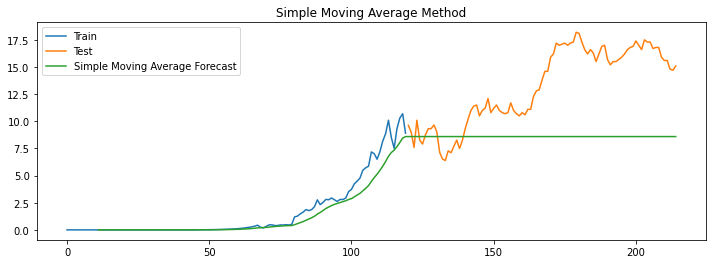

In [77]:
plot_method(y_hat_sma.sma_forecast, 'Simple Moving Average')

In [78]:
results = calculate_error(y_hat_sma.sma_forecast, 'Simple Moving Average', results, train_len)
results

,Method,RMSE,MAPE
0,Naive Method,5.51,31.38
0,Simple Average Method,12.02,86.29
0,Simple Moving Average Method,5.76,32.87


In [79]:
#Exponential Smoothing Methods Simple Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train.CO2)
model_fit = model.fit(smoothing_level=0.2, optimized=False)
model_fit.params

y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(95)

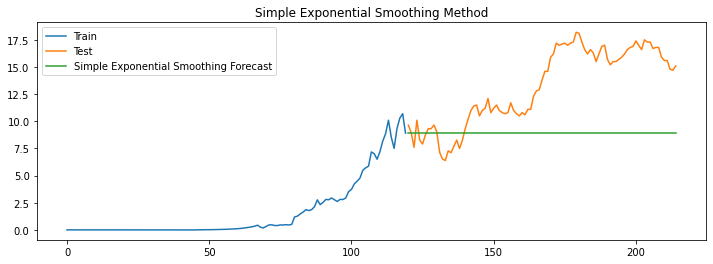

In [80]:
plot_method(y_hat_ses.ses_forecast, 'Simple Exponential Smoothing')

In [81]:
results = calculate_error(y_hat_ses.ses_forecast, 'Simple Exponential Smoothing', results, 0)
results

,Method,RMSE,MAPE
0,Naive Method,5.51,31.38
0,Simple Average Method,12.02,86.29
0,Simple Moving Average Method,5.76,32.87
0,Simple Exponential Smoothing Method,5.50,31.29


In [83]:
#Holt's Exponential Smoothing Method with Trend
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(np.array(train.CO2), seasonal_periods=12, trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)

print(model_fit.params)

y_hat_holt = create_method('holt_forecast', model_fit.forecast(95))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 0.00568, 'initial_slope': -6.999999999999975e-05, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


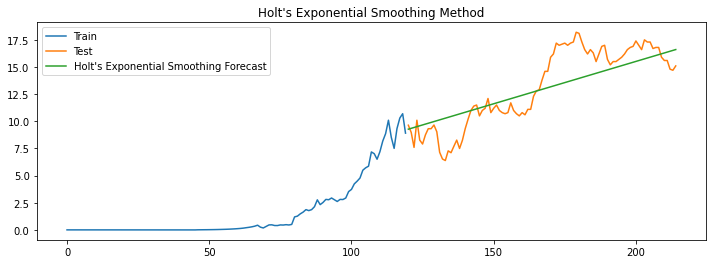

In [84]:
plot_method(y_hat_holt.holt_forecast, 'Holt\'s Exponential Smoothing')

In [85]:
results = calculate_error(y_hat_holt.holt_forecast, 'Holt\'s Exponential Smoothing', results, 0)
results

,Method,RMSE,MAPE
0,Naive Method,5.51,31.38
0,Simple Average Method,12.02,86.29
0,Simple Moving Average Method,5.76,32.87
0,Simple Exponential Smoothing Method,5.50,31.29
0,Holt's Exponential Smoothing Method,1.93,13.09


In [86]:
#Holt Winter's Additive Method with Trend & Seasonality
model = ExponentialSmoothing(np.asarray(train.CO2), seasonal_periods=12, trend='add', seasonal='add')
model_fit = model.fit(optimized=True)

print(model_fit.params)

y_hat_hwa = create_method('hwa_forecast', model_fit.forecast(95))

{'smoothing_level': 0.5057424687684952, 'smoothing_slope': 0.1031503129989494, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 1.274290932050408, 'initial_slope': 0.0, 'initial_seasons': array([-1.21671261, -1.35385915, -1.33293879, -1.2151259 , -1.13936971,
       -1.08008301, -1.27076442, -1.38524927, -1.1688294 , -1.12168117,
       -1.13610271, -1.26117715]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


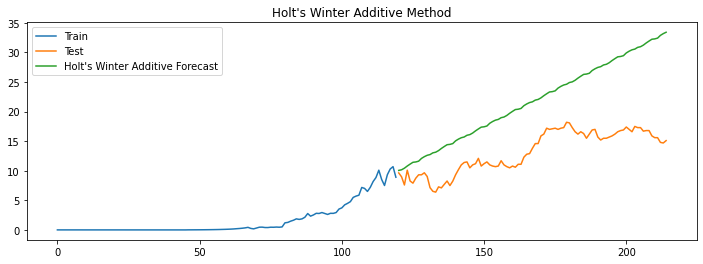

In [87]:
plot_method(y_hat_hwa.hwa_forecast, 'Holt\'s Winter Additive')


In [88]:
results = calculate_error(y_hat_hwa.hwa_forecast, 'Holt\'s Winter Additive', results, 0)
results

,Method,RMSE,MAPE
0,Naive Method,5.51,31.38
0,Simple Average Method,12.02,86.29
0,Simple Moving Average Method,5.76,32.87
0,Simple Exponential Smoothing Method,5.50,31.29
0,Holt's Exponential Smoothing Method,1.93,13.09
0,Holt's Winter Additive Method,9.45,64.40


In [89]:
#Holt Winter's Multiplicative Method with Trend & Seasonality
final_model = ExponentialSmoothing(np.asarray(train.CO2), trend='mul',seasonal='mul',seasonal_periods=12)
model_fit = final_model.fit(optimized=True)

print(model_fit.params)

y_hat_hwm = create_method('hwm_forecast', model_fit.forecast(95))

{'smoothing_level': 0.6353767512817904, 'smoothing_slope': 0.28609229591930796, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 1.2323156629788454, 'initial_slope': 0.9842844297879959, 'initial_seasons': array([0.00367432, 0.0032722 , 0.00340738, 0.00371536, 0.00388708,
       0.00415784, 0.00358116, 0.00328326, 0.00379559, 0.00398339,
       0.00399758, 0.00364824]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


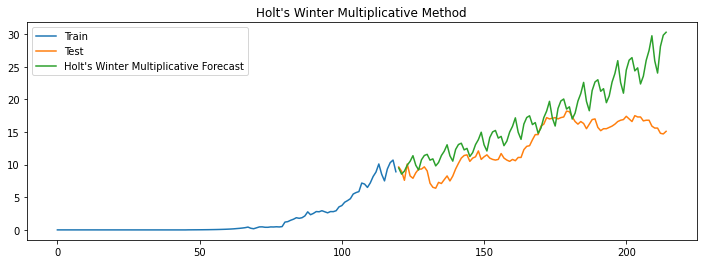

In [90]:
plot_method(y_hat_hwm.hwm_forecast, 'Holt\'s Winter Multiplicative')

In [91]:
results = calculate_error(y_hat_hwm.hwm_forecast, 'Holt\'s Winter Multiplicative', results, 0)
results

,Method,RMSE,MAPE
0,Naive Method,5.51,31.38
0,Simple Average Method,12.02,86.29
0,Simple Moving Average Method,5.76,32.87
0,Simple Exponential Smoothing Method,5.50,31.29
0,Holt's Exponential Smoothing Method,1.93,13.09
0,Holt's Winter Additive Method,9.45,64.40
0,Holt's Winter Multiplicative Method,5.29,31.39
